# 03. PHÂN TÍCH THÀNH PHẦN CHÍNH (PCA)

## Principal Component Analysis

**Mục đích chính:**
- Giảm chiều dữ liệu từ 3 biến (FDI, GDP_Growth, Trade_Openness) xuống 2 PC
- Loại bỏ đa cộng tuyến và giữ lại phương sai tối đa
- Tạo visualization 2D để phân biệt các quốc gia ASEAN

**Công thức:**
- $PC_i = w_{i1}X_1 + w_{i2}X_2 + w_{i3}X_3$
- Explained Variance Ratio: $\frac{\lambda_i}{\sum\lambda_j}$

**Output:** PC1 và PC2 với tổng phương sai giải thích > 80%

---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported!")

✅ Libraries imported!


In [5]:
df = pd.read_csv('../01_Data/02_Processed/ASEAN_Transformed_Data.csv')
print(f"✅ Data loaded: {df.shape}")

✅ Data loaded: (225, 13)


## Apply PCA

In [6]:
# Use scaled features
X_scaled = df[['FDI_log_scaled', 'GDP_Growth_scaled', 'Trade_Openness_log_scaled']].values

# Apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']
)
pca_df['Country'] = df['Country'].values
pca_df['Year'] = df['Year'].values

print("📊 PCA Results:")
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {pca.explained_variance_ratio_.sum():.2%}")
print(f"\nPC1 explains: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2 explains: {pca.explained_variance_ratio_[1]:.2%}")

📊 PCA Results:
Explained Variance Ratio: [0.43229317 0.32727636]
Total Variance Explained: 75.96%

PC1 explains: 43.23%
PC2 explains: 32.73%


In [7]:
# Component Loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=['FDI_log', 'GDP_Growth', 'Trade_Openness_log']
)
print("\n📊 Component Loadings:")
print(loadings)


📊 Component Loadings:
                         PC1       PC2
FDI_log             0.685562 -0.177247
GDP_Growth          0.240341  0.970634
Trade_Openness_log  0.687198 -0.162645


## Visualization

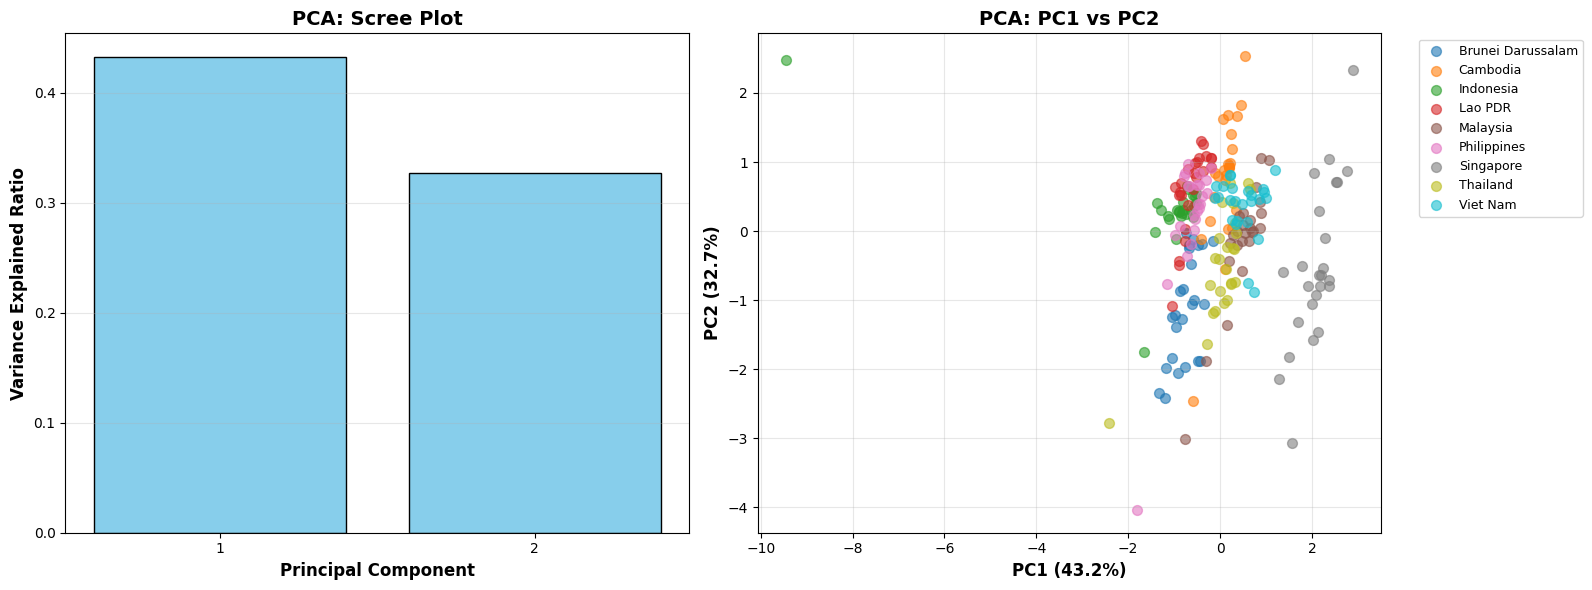


✅ PCA completed & saved!


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scree plot
axes[0].bar(range(1, 3), pca.explained_variance_ratio_, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Principal Component', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Variance Explained Ratio', fontsize=12, fontweight='bold')
axes[0].set_title('PCA: Scree Plot', fontsize=14, fontweight='bold')
axes[0].set_xticks([1, 2])
axes[0].grid(axis='y', alpha=0.3)

# PC1 vs PC2 scatter
countries = pca_df['Country'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))

for i, country in enumerate(countries):
    country_data = pca_df[pca_df['Country'] == country]
    axes[1].scatter(country_data['PC1'], country_data['PC2'], 
                   label=country, alpha=0.6, s=50, color=colors[i])

axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12, fontweight='bold')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12, fontweight='bold')
axes[1].set_title('PCA: PC1 vs PC2', fontsize=14, fontweight='bold')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../03_Results/05_PCA_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ PCA completed & saved!")

In [9]:
# Save PCA results
pca_df.to_csv('../03_Results/PCA_Results.csv', index=False)
loadings.to_csv('../03_Results/PCA_Loadings.csv')
print("✅ PCA results saved!")

✅ PCA results saved!
